# Insurance Premium Prediction

##  Problem statement.

**Data:** Sensor Data

**Problem statement :** The goal of this project is to give people an estimate of how much they need based on their individual health situation. After that, customers can work with any health insurance carrier and its plans and perks while keeping the projected cost from our study in mind. This can assist a person in concentrating on the health side of an insurance policy rather han the ineffective part.

**Aim of the Project :** The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium

##  Import required libraries

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from scipy.stats import ttest_1samp, ttest_ind, chi2_contingency
from statsmodels.stats.power import ttest_power
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import metrics 
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

#### Read Data

In [51]:
# Load csv file
df = pd.read_csv('insurance.csv', na_values="na")

In [52]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [53]:
# check rows and columns of the dataset
df.shape

(1338, 7)

### Introduction

- The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value desginated for each level.




#### Printing the datatype of each attribute in the dataframe

In [54]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

#### Checking the presence of null values

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- There is no null values in the dataframe as indicated by the info function We have another function to check directly the presence of any null values in the dataframe.

In [56]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

### Describing data

#### categorical Features

In [57]:
def cat(dataframe):
    categorical_features=[feature for feature in dataframe.columns if df[feature].dtypes == 'O']
    print("No. of Categorical feature : ",len(categorical_features))
    print(categorical_features)

In [58]:
cat(df)

No. of Categorical feature :  3
['sex', 'smoker', 'region']


#### Numerical Features

In [59]:
def num(dataframe):
    numerical_features=[feature for feature in dataframe.columns if dataframe[feature].dtypes != 'O']
    print("No. of Numerical feature : ",len(numerical_features),"\n")
    discrete_features=[feature for feature in numerical_features if dataframe[feature].nunique() <25 ]
    continous_features=[feature for feature in numerical_features if feature not in discrete_features]
    print("No. of Discrete feature : ",len(discrete_features))
    print(discrete_features,'\n')
    print("No. of Continous feature : ",len(continous_features))
    print(continous_features)

In [60]:
num(df)

No. of Numerical feature :  4 

No. of Discrete feature :  1
['children'] 

No. of Continous feature :  3
['age', 'bmi', 'expenses']


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [62]:
df.describe(include=object).T # for categorical column

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


### Distribution

#### Numerical Features

<AxesSubplot:xlabel='bmi', ylabel='Density'>

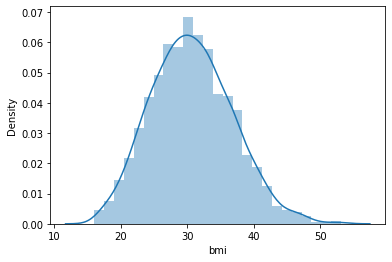

In [63]:



sns.distplot(df['bmi']) #Distribution of BMI

<AxesSubplot:xlabel='age', ylabel='Density'>

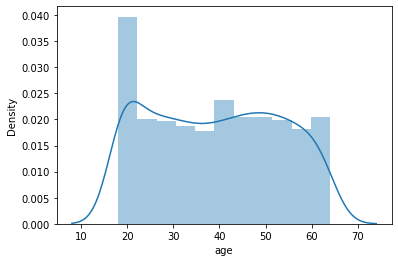

In [64]:
sns.distplot(df['age']) #Distribution of Age


<AxesSubplot:xlabel='expenses', ylabel='Density'>

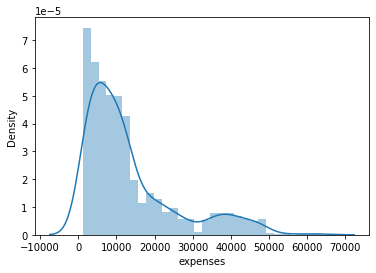

In [65]:
sns.distplot(df['expenses']) #Distribution of expenses

#### Categorical Features

<AxesSubplot:>

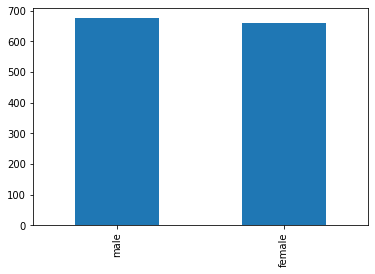

In [66]:
df['sex'].value_counts().plot.bar() #Distribution of sex

<AxesSubplot:>

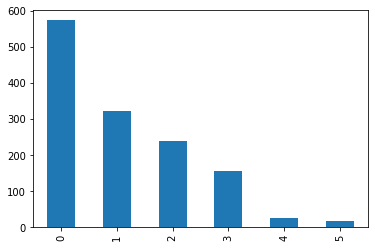

In [67]:
df['children'].value_counts().plot.bar() #Distribution of children

<AxesSubplot:>

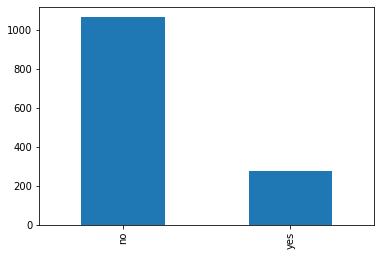

In [68]:
df['smoker'].value_counts().plot.bar() #Distribution of smoker

<AxesSubplot:>

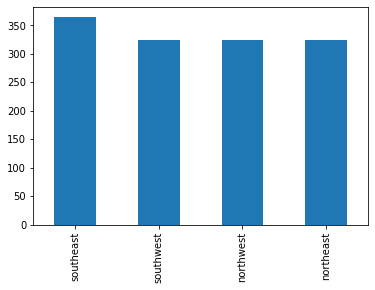

In [69]:
df['region'].value_counts().plot.bar() #Distribution of region

### Checking outliers in bmi, age and expenses

<AxesSubplot:xlabel='bmi'>

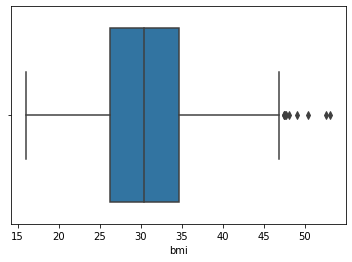

In [70]:
sns.boxplot(df['bmi']) 

<AxesSubplot:xlabel='age'>

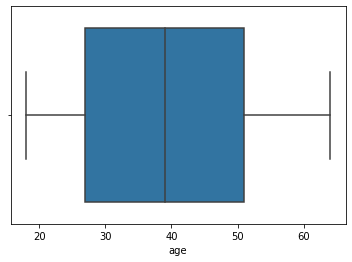

In [71]:
sns.boxplot(df['age']) 

<AxesSubplot:xlabel='expenses'>

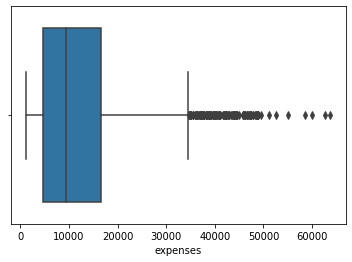

In [72]:
sns.boxplot(df['expenses']) 

#### The box plot reveals that BMI and Expenses have outliers while Age do not have any outliers

### Pairplot of columns

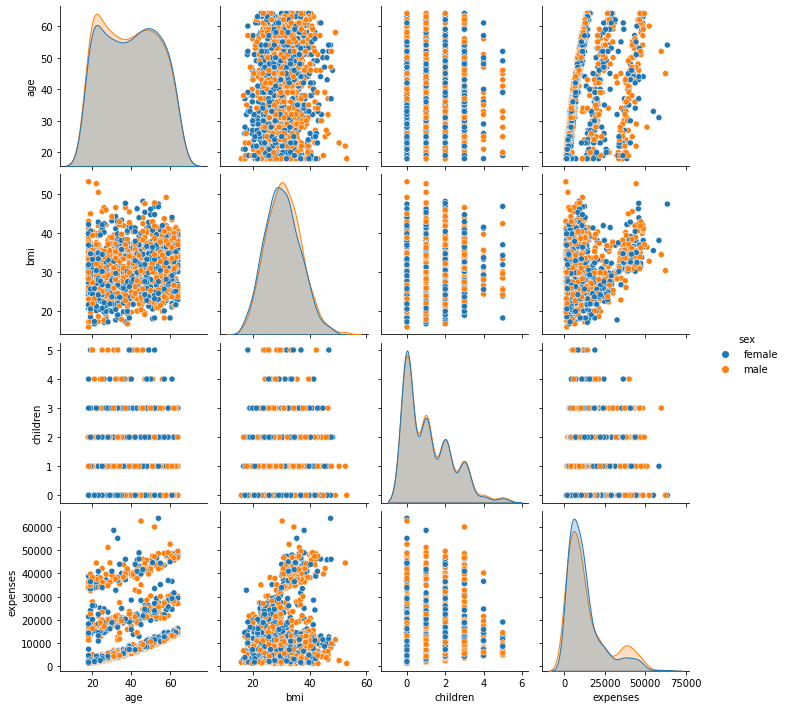

In [73]:
sns.pairplot(df, hue='sex')

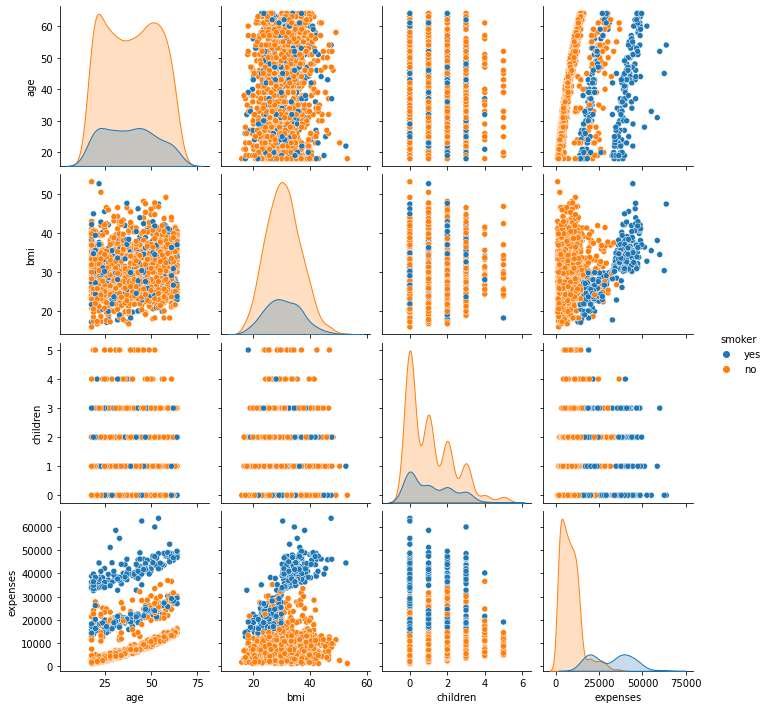

In [74]:
sns.pairplot(df, hue='smoker')

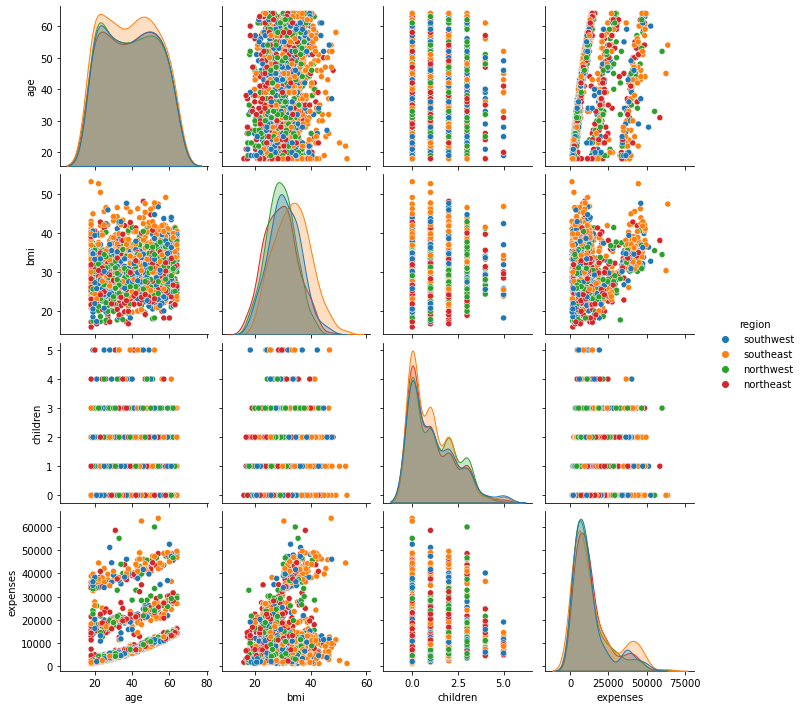

In [75]:
sns.pairplot(df, hue='region')

**Expenses of people who smoke differ significantly from the people who don't? Approach: We would apply 2 sample Ttest Null Hypothesis.** 
- Ho = There is no relation between smokers and expenses.
- Alternate Hypothesis H1 = There is a relation between smokers and charges.

In [76]:
smoker_df = df[df['smoker']=='yes'] #Creating a sub-dataframe for smokers
smoker_df.head() 

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
11,62,female,26.3,0,yes,southeast,27808.73
14,27,male,42.1,0,yes,southeast,39611.76
19,30,male,35.3,0,yes,southwest,36837.47
23,34,female,31.9,1,yes,northeast,37701.88


In [77]:
nonsmoker_df = df[df['smoker']=='no'] #Creating a sub-dataframe for smokers
nonsmoker_df.head() 

,age,sex,bmi,children,smoker,region,expenses
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62


In [78]:
# finding the ttest independence between the expenses of smokers and non smokers
t_statistic, p_value = ttest_ind(smoker_df['expenses'], nonsmoker_df['expenses'])
print(t_statistic, p_value)

46.6649210792002 8.271449574495316e-283


* Since the P-Value is less than the accepted standard of 0.05, we reject the null hypothesis. Hence There is a relation between smokers and charges Computing the power of the test

**Does bmi of males differ significantly from that of females? Approach: We would apply 2 sample Ttest Null Hypothesis.** 
- Ho = There is no relation between bmi and gender.
- Alternate Hypothesis H1 = These is a relation between bmi and gender.

In [79]:
male_bmi_df = df[df['sex']=='male'] #Creating a sub-dataframe for all males
male_bmi_df.head()

,age,sex,bmi,children,smoker,region,expenses
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
8,37,male,29.8,2,no,northeast,6406.41


In [80]:
female_bmi_df = df[df['sex']=='female'] #Creating a sub-dataframe for all females
female_bmi_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
9,60,female,25.8,0,no,northwest,28923.14


In [81]:
# finding the ttest independence between the bmi of male and female
t_statistic, p_value = ttest_ind(male_bmi_df['bmi'], female_bmi_df['bmi'])
print(t_statistic, p_value)

1.6970846764986391 0.08991356987176295


* Since the P-Value is more than the accepted standard of 0.05, we fail to reject the null hypothesis. Hence There is no relation between bmi and gender Computing the power of the test

## Pre-processing

### Dealing with Outliers

* we are handling outliers by using Robust scalar

### Checking correlation

In [82]:
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


### Dealing with the Categorical Variables

In [83]:
y = df['expenses'].to_frame(name='Target')
X = df.drop('expenses', axis=1)

In [84]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes == 'O']
for feature in categorical_features:
        label = preprocessing.LabelEncoder()
        X[feature] = label.fit_transform(X[feature])

In [85]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1


## Create Functions for model training and evaluation

In [86]:
# df to store model error and scores
model_scores = pd.DataFrame(columns=['model', 'rmse', 'r2_score', 'mae'])

In [87]:
def train_and_evaluate_model(models, X, y):
    '''
    Create a training pipeline to scale and train the model
    using the input data, then evaluate the model and safe its error
    and score in the scores dataframe.
    '''
    models_list = []
    accuracy_list = []
    
    # split the data
    X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model
        
        # create a training pipeline
        pipeline = make_pipeline(RobustScaler(), model)

        # apply scaling on training data and train the model
        pipeline.fit(X_train, y_train)

        # predict the validation set
        y_test_pred = pipeline.predict(X_validate)
        y_train_pred = pipeline.predict(X_train)

        # evaluate the model
        r2_score_train = r2_score(y_train, y_train_pred)
        rmse = np.sqrt(mean_squared_error(y_validate, y_test_pred))
        model_score = r2_score(y_validate, y_test_pred)
        mae = mean_absolute_error(y_validate, y_test_pred)

        print('----------------------------------')
        print(list(models.keys())[i],' Report:')
        models_list.append(list(models.keys())[i])
        print('----------------------------------')
        print('   Train data ')
        print('R2 Score: ', r2_score_train)
        print('----------------------------------')
        print('   Test data  ')
        print('RMSE: ', rmse)
        print('R2 Score: ', model_score)
        accuracy_list.append(model_score)
        print('MAE: ', mae,'\n\n')
    
    # adding error and score, to the scores datafrane
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)   
    
    return report

In [88]:
# Dictionary which contains models for experiment
models = {
    "Linear Regression" : LinearRegression(),
    "Ridege Rgression" : Ridge(),
    "Lasso Regression" : Lasso(),
    "ElastcNet regression" : ElasticNet(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
     "XGB Regressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [89]:
report = train_and_evaluate_model(models, X, y)

----------------------------------
Linear Regression  Report:
----------------------------------
   Train data 
R2 Score:  0.7417300723597997
----------------------------------
   Test data  
RMSE:  5799.92026582936
R2 Score:  0.7833214205203846
MAE:  4186.940106317017 


----------------------------------
Ridege Rgression  Report:
----------------------------------
   Train data 
R2 Score:  0.741708345081042
----------------------------------
   Test data  
RMSE:  5803.486149975711
R2 Score:  0.7830549036735899
MAE:  4197.862488774322 


----------------------------------
Lasso Regression  Report:
----------------------------------
   Train data 
R2 Score:  0.7417299384277019
----------------------------------
   Test data  
RMSE:  5800.307872121531
R2 Score:  0.7832924584714908
MAE:  4187.384242633097 


----------------------------------
ElastcNet regression  Report:
----------------------------------
   Train data 
R2 Score:  0.3475795015009747
----------------------------------
  

In [90]:
report

,Model Name,Accuracy
4,Random Forest,0.866688
7,XGB Regressor,0.842136
8,AdaBoost Regressor,0.811267
6,K-Neighbors Regressor,0.787146
0,Linear Regression,0.783321
2,Lasso Regression,0.783292
1,Ridege Rgression,0.783055
5,Decision Tree,0.704305
3,ElastcNet regression,0.361718


## HyperParameter Tuning

In [91]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

### RandomForest Regressor

In [92]:

param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
random_forest = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = param_grid, cv = 5, verbose=2, random_state=42, n_jobs = 4)
rf_random.fit(X_train, y_train)
print(rf_random.best_score_,rf_random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.8340169360814492 {'n_estimators': 20, 'min_samples_split': 8, 'max_features': 'log2', 'bootstrap': False}


### AdaBoost Regressor

In [93]:
param_adr = {'n_estimators':[500,1000,2000],
             'learning_rate':[.001,0.005,0.01,.1],
             'random_state':[1]
             }
DTR = DecisionTreeRegressor(random_state = 11, max_features = "auto",max_depth = None)
AdaBoost_regressor = AdaBoostRegressor(base_estimator = DTR)
adr_random = RandomizedSearchCV(estimator = AdaBoost_regressor , param_distributions = param_adr, cv = 5, verbose=2, random_state=42, n_jobs = 4)
adr_random.fit(X_train, y_train)
print(adr_random.best_score_,adr_random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.8220459227738367 {'random_state': 1, 'n_estimators': 500, 'learning_rate': 0.001}


### KNN Regressor

In [94]:
param_knn = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              'weights': ['uniform','distance'],
              'p':[1,2,5]}
knn = KNeighborsRegressor()
# Create 3 folds
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
knn_random = RandomizedSearchCV(estimator = knn, param_distributions = param_knn, cv = 5, verbose=2, random_state=42, n_jobs = 4)
knn_random.fit(X_train, y_train)
print(knn_random.best_score_,knn_random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.3117247657878612 {'weights': 'distance', 'p': 1, 'n_neighbors': 14}


### XGB Regressor

In [95]:
param_xgb = {
    'n_estimators':[500],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

xgb = XGBRegressor()
n_iter_search = 100
xgb_random = RandomizedSearchCV(estimator= xgb, param_distributions=param_xgb,n_iter=n_iter_search, cv=5)
xgb_random.fit(X_train, y_train)
print(xgb_random.best_score_,xgb_random.best_params_)

0.7834750070536772 {'objective': 'reg:squarederror', 'n_estimators': 500, 'eval_metric': 'rmse', 'eta': 0.3, 'booster': 'gbtree'}


In [102]:
# Dictionary which contains models for experiment
models_2 = {
    "Random Forest": RandomForestRegressor(bootstrap= True, max_features= 'log2', min_samples_split= 4, n_estimators= 30),
    "K-Neighbors Regressor": KNeighborsRegressor(weights= 'distance', p= 1, n_neighbors= 14),
     "XGB Regressor": XGBRegressor( objective= 'reg:squarederror', n_estimators= 500, eval_metric= 'rmse', eta= 0.3, booster= 'gbtree'), 
    "AdaBoost Regressor": AdaBoostRegressor(learning_rate= 0.001, n_estimators= 500, random_state=1)
}

In [103]:
report_2 = train_and_evaluate_model(models_2, X, y)

----------------------------------
Random Forest  Report:
----------------------------------
   Train data 
R2 Score:  0.9498716537065937
----------------------------------
   Test data  
RMSE:  4547.120641090377
R2 Score:  0.8668181979442928
MAE:  2676.3170486412178 


----------------------------------
K-Neighbors Regressor  Report:
----------------------------------
   Train data 
R2 Score:  0.9983078115527046
----------------------------------
   Test data  
RMSE:  5859.243504890091
R2 Score:  0.7788662514313096
MAE:  3620.6775962551624 


----------------------------------
XGB Regressor  Report:
----------------------------------
   Train data 
R2 Score:  0.9983072263340634
----------------------------------
   Test data  
RMSE:  5140.390221162124
R2 Score:  0.8297982148293578
MAE:  3041.154249593251 


----------------------------------
AdaBoost Regressor  Report:
----------------------------------
   Train data 
R2 Score:  0.8582931657741921
----------------------------------
  

In [104]:
report_2

,Model Name,Accuracy
0,Random Forest,0.866818
3,AdaBoost Regressor,0.854491
2,XGB Regressor,0.829798
1,K-Neighbors Regressor,0.778866
